In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



Using TensorFlow backend.


In [2]:
import pandas_datareader.data as web
from datetime import datetime as dt

start = dt(2017,1,1)
end = dt(2018,11,1)

f = web.DataReader("AAPL", "av-daily", start, end, access_key="0EBZ40XQYX7DH0V3")

from copy import deepcopy
data = deepcopy(f)

In [3]:
scl = MinMaxScaler()
#Scale the data
c1 = np.array((data['high'] + data['low'])/2)
cl = c1.reshape(c1.shape[0],1)
cl = scl.fit_transform(cl)
cl


array([[0.        ],
       [0.00503963],
       [0.00682374],
       [0.0152481 ],
       [0.02705031],
       [0.0283856 ],
       [0.03204686],
       [0.02765334],
       [0.03161613],
       [0.03174535],
       [0.03928325],
       [0.03605272],
       [0.03917385],
       [0.04087698],
       [0.03665575],
       [0.04863025],
       [0.0557805 ],
       [0.05539283],
       [0.04824259],
       [0.04703653],
       [0.11375775],
       [0.11233632],
       [0.11311165],
       [0.12194176],
       [0.13546692],
       [0.13934356],
       [0.13988198],
       [0.14601999],
       [0.15282564],
       [0.16044969],
       [0.17143349],
       [0.17078653],
       [0.17160579],
       [0.17935906],
       [0.18151275],
       [0.18388181],
       [0.17595624],
       [0.18360183],
       [0.18541092],
       [0.20096054],
       [0.20653256],
       [0.20386802],
       [0.20363499],
       [0.2053756 ],
       [0.2047295 ],
       [0.192755  ],
       [0.20204643],
       [0.203

In [4]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,10)
X_train,X_validation, X_test = X[:int(X.shape[0]*0.60)],X[int(X.shape[0]*0.60):int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_validation, y_test = y[:int(y.shape[0]*0.60)],y[int(y.shape[0]*0.60):int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(271, 10)
(271,)
(90, 10)
(90,)
(91, 10)
(91,)


In [5]:
#Build the model
model = Sequential()
model.add(LSTM(512,input_shape=(10,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_validation = X_validation.reshape((X_validation.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_validation,y_validationy_test),shuffle=False)

Train on 271 samples, validate on 90 samples
Epoch 1/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0090 - val_loss: 0.0021
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 4/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 5/300
271/271 [==============================] - 1s 5ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/300
271/271 [==============================] - 1s 5ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/300
271/271 [==============================] - 1s 4ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/300
271/271 [==============================] - 2s 6ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 9/300
271/271 [==============================] - 1s 4ms/step - loss: 9.6895e-04 - val_loss: 0.0018
Epoch 10/300
271/271 [====================

271/271 [==============================] - 1s 3ms/step - loss: 3.6078e-04 - val_loss: 6.6299e-04
Epoch 152/300
271/271 [==============================] - 1s 3ms/step - loss: 3.4708e-04 - val_loss: 7.4780e-04
Epoch 153/300
271/271 [==============================] - 1s 3ms/step - loss: 3.5863e-04 - val_loss: 5.2465e-04
Epoch 154/300
271/271 [==============================] - 1s 3ms/step - loss: 4.6930e-04 - val_loss: 7.2168e-04
Epoch 155/300
271/271 [==============================] - 1s 3ms/step - loss: 5.7535e-04 - val_loss: 6.4767e-04
Epoch 156/300
271/271 [==============================] - 1s 3ms/step - loss: 4.3243e-04 - val_loss: 5.7405e-04
Epoch 157/300
271/271 [==============================] - 1s 3ms/step - loss: 3.4418e-04 - val_loss: 7.4401e-04
Epoch 158/300
271/271 [==============================] - 1s 3ms/step - loss: 3.5084e-04 - val_loss: 6.3545e-04
Epoch 159/300
271/271 [==============================] - 1s 3ms/step - loss: 3.8325e-04 - val_loss: 5.5808e-04
Epoch 160/300
2

Epoch 225/300
271/271 [==============================] - 1s 3ms/step - loss: 2.8072e-04 - val_loss: 4.4539e-04
Epoch 226/300
271/271 [==============================] - 1s 3ms/step - loss: 3.3048e-04 - val_loss: 4.4416e-04
Epoch 227/300
271/271 [==============================] - 1s 3ms/step - loss: 3.2489e-04 - val_loss: 4.3876e-04
Epoch 228/300
271/271 [==============================] - 1s 3ms/step - loss: 2.6177e-04 - val_loss: 4.7969e-04
Epoch 229/300
271/271 [==============================] - 1s 3ms/step - loss: 2.5026e-04 - val_loss: 4.7050e-04
Epoch 230/300
271/271 [==============================] - 1s 3ms/step - loss: 2.6121e-04 - val_loss: 4.2448e-04
Epoch 231/300
271/271 [==============================] - 1s 3ms/step - loss: 2.8562e-04 - val_loss: 4.4173e-04
Epoch 232/300
271/271 [==============================] - 1s 3ms/step - loss: 3.2411e-04 - val_loss: 4.2929e-04
Epoch 233/300
271/271 [==============================] - 1s 3ms/step - loss: 2.9178e-04 - val_loss: 4.4064e-04
E

Epoch 299/300
271/271 [==============================] - 1s 3ms/step - loss: 2.5820e-04 - val_loss: 4.0616e-04
Epoch 300/300
271/271 [==============================] - 1s 3ms/step - loss: 3.3603e-04 - val_loss: 4.2755e-04


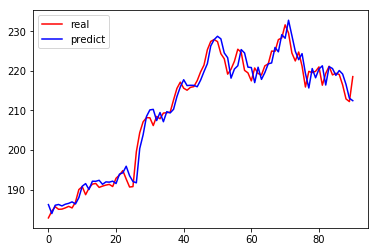

In [6]:
Xt = model.predict(X_test)
real, = plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), color = 'red')
predict, = plt.plot(scl.inverse_transform(Xt), color = 'blue')
plt.legend(handles = [real, predict,], labels = ['real', 'predict'], loc = 'best')

In [7]:
print(y_test)

[0.57960028 0.5943315  0.60398001 0.59838043 0.59876809 0.60143866
 0.60475534 0.60130944 0.61399035 0.64132495 0.64770029 0.63016842
 0.64451241 0.6532133  0.6546132  0.64601999 0.64886285 0.65105961
 0.65261027 0.6479583  0.66600663 0.67276878 0.68263267 0.66419711
 0.64688146 0.64778601 0.72355272 0.76516196 0.78881073 0.79785493
 0.79759649 0.7806685  0.80069779 0.79548587 0.80789972 0.80862336
 0.80970021 0.83645805 0.86156099 0.87525844 0.86201327 0.85764128
 0.86388697 0.86543763 0.87861819 0.89752757 0.91234493 0.94577016
 0.9639042  0.96795314 0.96347347 0.93711234 0.92604238 0.89261716
 0.90355358 0.92070124 0.94689008 0.94017919 0.90080117 0.89541695
 0.87797209 0.90601309 0.89403859 0.89076499 0.91070813 0.91497243
 0.94284114 0.94232426 0.96778084 0.97148518 1.         0.98203825
 0.93857684 0.92139042 0.94084338 0.91019125 0.86461923 0.89864748
 0.89597691 0.89878834 0.90838215 0.86858201 0.89421089 0.90976051
 0.89102343 0.89455548 0.89179876 0.8690989  0.83860269 0.8328

In [8]:
print(Xt)

[[0.60857797]
 [0.58908904]
 [0.60716766]
 [0.6088493 ]
 [0.6057355 ]
 [0.6094104 ]
 [0.61134815]
 [0.61453235]
 [0.6099396 ]
 [0.62368214]
 [0.6486409 ]
 [0.6543169 ]
 [0.6414579 ]
 [0.65950334]
 [0.6593223 ]
 [0.66148776]
 [0.6527728 ]
 [0.6580112 ]
 [0.65745836]
 [0.65965414]
 [0.6544621 ]
 [0.67488515]
 [0.6777904 ]
 [0.6921264 ]
 [0.67142415]
 [0.65884495]
 [0.65600944]
 [0.7306578 ]
 [0.7605656 ]
 [0.8004997 ]
 [0.81476367]
 [0.8159399 ]
 [0.7915612 ]
 [0.80905306]
 [0.78902197]
 [0.81092405]
 [0.8082056 ]
 [0.81607366]
 [0.84373283]
 [0.8648716 ]
 [0.88046026]
 [0.86775327]
 [0.8683651 ]
 [0.8682166 ]
 [0.8651859 ]
 [0.879555  ]
 [0.8980562 ]
 [0.91540146]
 [0.9540325 ]
 [0.9677412 ]
 [0.97509205]
 [0.969417  ]
 [0.93876135]
 [0.928455  ]
 [0.8838906 ]
 [0.9036536 ]
 [0.91091853]
 [0.9461753 ]
 [0.93873566]
 [0.9078634 ]
 [0.90699613]
 [0.8741561 ]
 [0.90771616]
 [0.881207  ]
 [0.89605606]
 [0.9150939 ]
 [0.9170371 ]
 [0.95069814]
 [0.9412638 ]
 [0.9785385 ]
 [0.97079027]
 [1.00

In [9]:
print(X_test)

[[[0.65080117]
  [0.65761113]
  [0.65571158]
  [0.6491213 ]
  [0.63460544]
  [0.6259907 ]
  [0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]]

 [[0.65761113]
  [0.65571158]
  [0.6491213 ]
  [0.63460544]
  [0.6259907 ]
  [0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]
  [0.57960028]]

 [[0.65571158]
  [0.6491213 ]
  [0.63460544]
  [0.6259907 ]
  [0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]
  [0.57960028]
  [0.5943315 ]]

 [[0.6491213 ]
  [0.63460544]
  [0.6259907 ]
  [0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]
  [0.57960028]
  [0.5943315 ]
  [0.60398001]]

 [[0.63460544]
  [0.6259907 ]
  [0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]
  [0.57960028]
  [0.5943315 ]
  [0.60398001]
  [0.59838043]]

 [[0.6259907 ]
  [0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]
  [0.57960028]
  [0.5943315 ]
  [0.60398001]
  [0.59838043]
  [0.59876809]]

 [[0.59738973]
  [0.61095796]
  [0.61250861]
  [0.60199862]
  [0.57960028]
  [0.5943315 